# Lab №2

## Выполнение

### 0. Импортируем необходимые библиотеки 

In [20]:
from math import pi
import numpy as np
import roboticstoolbox as rtb
import matplotlib.pyplot as plt
import spatialmath.base as sb
import spatialmath as sm


### 1. Импортируем модель Puma560

In [2]:
robot = rtb.models.DH.Baxter()
print(robot)

DHRobot: Baxter-left (by Rethink Robotics), 7 joints (RRRRRRR), dynamics, standard DH parameters
┌───────────┬───────┬───────┬────────┐
│    θⱼ     │  dⱼ   │  aⱼ   │   ⍺ⱼ   │
├───────────┼───────┼───────┼────────┤
│  q1       │  0.27 │ 0.069 │ -90.0° │
│  q2 + 90° │     0 │     0 │  90.0° │
│  q3       │ 0.364 │ 0.069 │ -90.0° │
│  q4       │     0 │     0 │  90.0° │
│  q5       │ 0.374 │  0.01 │ -90.0° │
│  q6       │     0 │     0 │  90.0° │
│  q7       │  0.28 │     0 │   0.0° │
└───────────┴───────┴───────┴────────┘

┌──────┬──────┐
│ base │ None │
└──────┴──────┘

┌──────┬─────┬──────┬──────┬─────┬──────┬─────┬─────┐
│ name │ q0  │ q1   │ q2   │ q3  │ q4   │ q5  │ q6  │
├──────┼─────┼──────┼──────┼─────┼──────┼─────┼─────┤
│   qr │  0° │ -90° │ -90° │  0° │  0°  │  0° │  0° │
│   qz │  0° │  0°  │  0°  │  0° │  0°  │  0° │  0° │
│   qs │  0° │  0°  │ -90° │  0° │  0°  │  0° │  0° │
│   qn │  0° │  45° │  90° │  0° │  45° │  0° │  0° │
└──────┴─────┴──────┴──────┴─────┴──────┴─────

Now we will deffine the robot parameters including the mass of each link, center of masss for each link, intertia tensors, moments of inertia, and friction coefficiants.

In [3]:
robot.links[0].m = 20
robot.links[1].m = 17.4
robot.links[2].m = 4.8
robot.links[3].m = 0.82
robot.links[4].m = 0.34
robot.links[5].m = 0.09
robot.links[6].m = 0.05

robot.links[0].r = [0.0, 0.0, 0.1]    # base to shoulder, approx 0.1m up
robot.links[1].r = [0.0, 0.0, 0.27]   # upper arm link, COM near middle (~0.55m total length)
robot.links[2].r = [0.0, 0.0, 0.12]   # elbow link, shorter
robot.links[3].r = [0.0, 0.0, 0.06]   # forearm, lightweight
robot.links[4].r = [0.0, 0.0, 0.045]  # wrist link
robot.links[5].r = [0.0, 0.0, 0.03]   # small rotation link
robot.links[6].r = [0.0, 0.0, 0.02]   # end-effector or mounting link


robot.links[0].I = [0, 0.35, 0, 0, 0, 0]
robot.links[1].I = [0.13, 0.524, 0.539, 0, 0, 0]
robot.links[2].I = [0.066, 0.086, 0.0125, 0, 0, 0]
robot.links[3].I = [0.0018, 0.0013, 0.0018, 0, 0, 0]
robot.links[4].I = [0.0003, 0.0004, 0.0003, 0, 0, 0]
robot.links[5].I = [0.00015, 0.00015, 0.00004, 0, 0, 0]
robot.links[6].I = [0.00015, 0.00015, 0.00004, 0, 0, 0]

robot.links[0].Jm = 0.0004
robot.links[1].Jm = 0.0004
robot.links[2].Jm = 0.0004
robot.links[3].Jm = 0.000033
robot.links[4].Jm = 0.000033
robot.links[5].Jm = 0.000033
robot.links[6].Jm = 0.00003


robot.links[0].B = 0.0015
robot.links[1].B = 0.000817
robot.links[2].B = 0.00138
robot.links[3].B = 0.0000712
robot.links[4].B = 0.0000826
robot.links[5].B = 0.0000367
robot.links[6].B = 0.0000367

robot.links[0].Tc = [0.395, -0.435]
robot.links[1].Tc = [0.126, -0.071]
robot.links[2].Tc = [0.132, -0.105]
robot.links[3].Tc = [0.0112, -0.0169]
robot.links[4].Tc = [0.00926, -0.0145]
robot.links[5].Tc = [0.00396, -0.0105]
robot.links[6].Tc = [0.00396, -0.0105]

robot.links[0].G = -62.6111
robot.links[1].G = 107.8150000000000
robot.links[2].G = -53.7063
robot.links[3].G = 76.0364
robot.links[4].G = 71.923
robot.links[5].G = 76.686
robot.links[6].G = 70.686

Then we restrict the generalized coordinates range of field for each link

In [4]:
robot.links[0].qlim = [-2.792526803190927, 2.792526803190927]
robot.links[1].qlim = [-0.785398163397448, 3.926990816987241]
robot.links[2].qlim = [-3.926990816987241, 0.785398163397448]
robot.links[3].qlim = [-1.919862177193763, 2.967059728390360]
robot.links[4].qlim = [-1.745329251994330, 1.745329251994330]
robot.links[5].qlim = [-4.642575810304916, 4.642575810304916]
robot.links[6].qlim = [-4.642575810304916, 4.642575810304916]

### 2. Зададим начальное положение робота и построим его

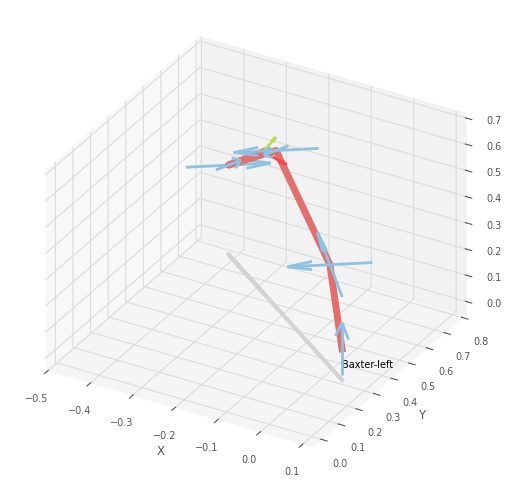

<Figure size 640x480 with 0 Axes>

In [5]:
q_start = [pi/2, -pi/4, 0, pi/2, -pi, pi,pi/4]
robot.plot(q_start)
plt.show()

### 3. Решим прямую задачу кинематики

Using 'fkine' method, we obtain the pose of the end-effector of the robot represented as homogeneous transformation matrix.

In [6]:
T_start = robot.fkine(q_start)
print(T_start)

   0.8536    0.1464    0.5      -0.2527    
   0.1464    0.8536   -0.5       0.5759    
  -0.5       0.5       0.7071    0.5382    
   0         0         0         1         



### 6. Построим рабочую зону манипулятора

Инициализируем переменные

Now we will create a workspace for the manipulator using the first 4 joints. The procedure is that we sample $n=20$ point from the minimum allowed value of the link to the maximum allowed value of the link. We will obtain $poses = 20^4=160000$ since we are working with 4 changing joints and 30 point.

In [7]:
n = 20  # Количество точек по каждой оси
i = 0  # Просто счетчик
move = [np.linspace(robot.links[i].qlim[0], robot.links[i].qlim[1], n) for i in range(5)] 
pose = np.zeros([3,n**4]) 

Рассчитываем рабочую зону

Now we loop over the workspace configurations that we created. For each configuration we compute the forward kinematics and obtain the pose of the end-effector. But we are only intereseted in the position of the end-effector here. Thus, we only keep the translation part of the tranformation matrix.

In [8]:
# Проходимся перебором по каждой точке
for q1 in move[0]:
    for q2 in move[1]:
        for q3 in move[2]:            
            for q4 in move[3]:
                Tt = robot.fkine([q1,q2,q3,q4,0,0,0])  # Решаем ПЗК, меняя только первые 3 обобщенных координаты
                for j in range(3):
                    pose[j][i] = Tt.t[j]  # Сохраняем точку
                i += 1

Строим рабочую зону

Here we visualize each solution to the forward kinematics as a point in the 3d space and plot the results.

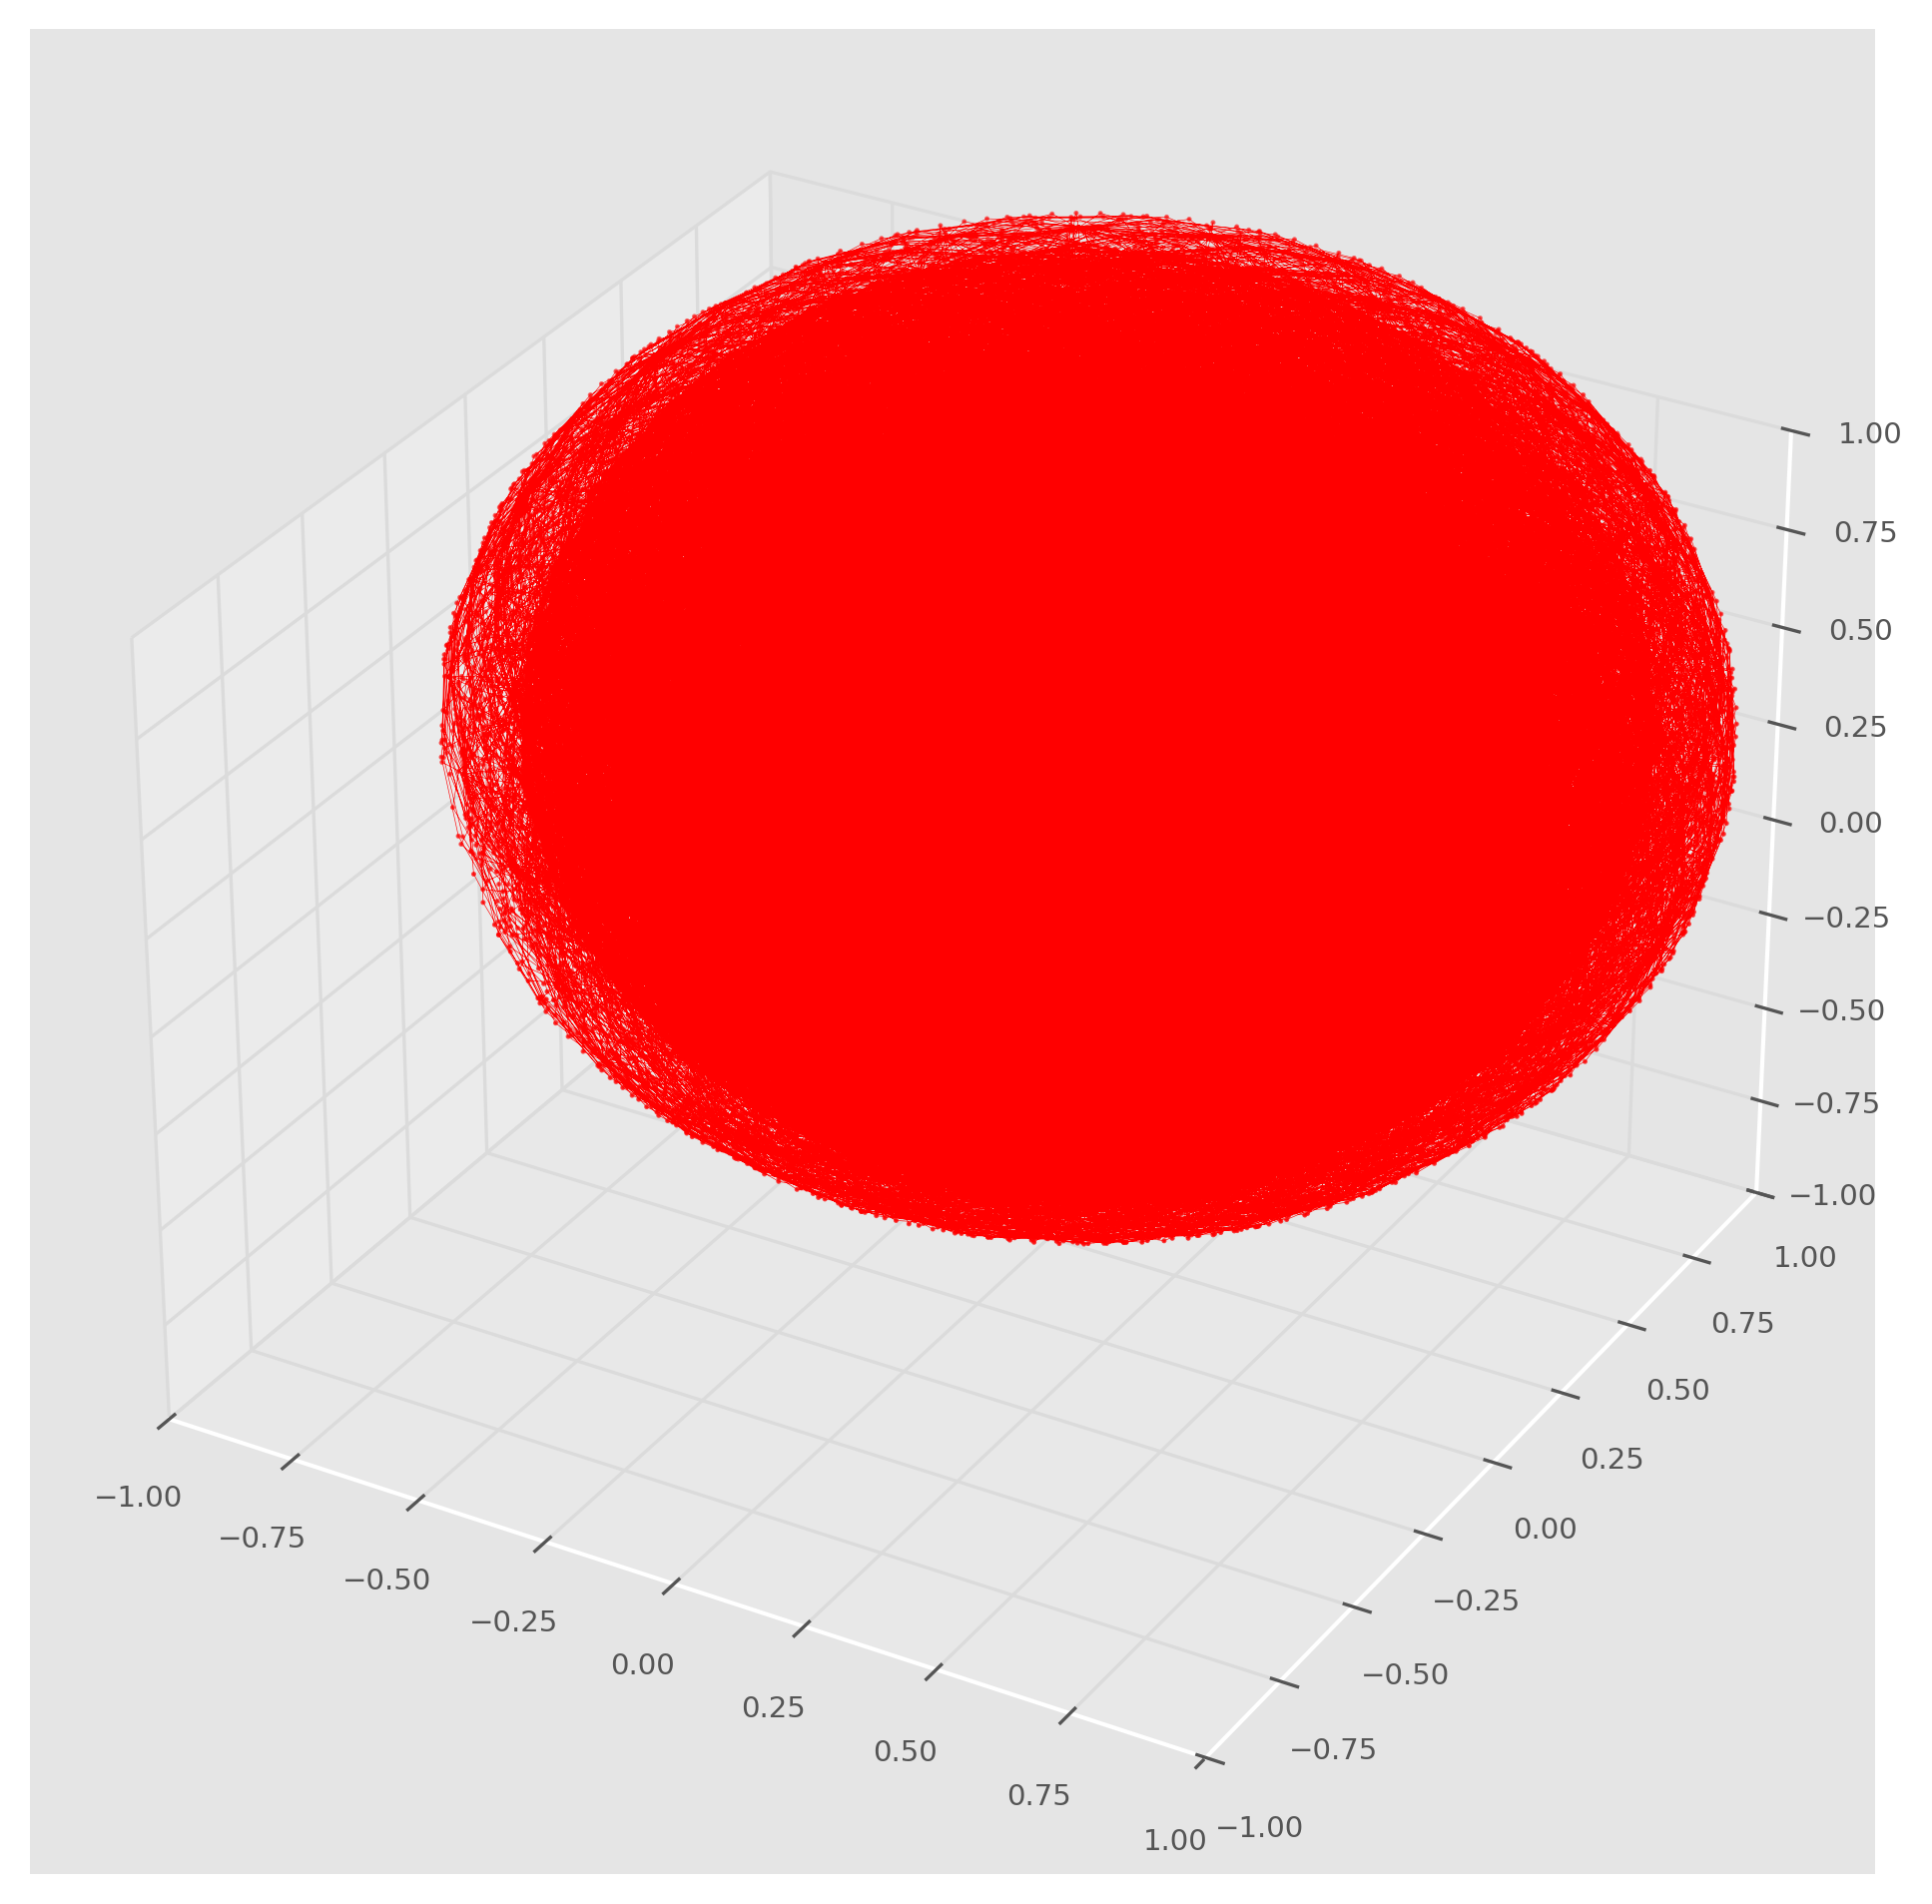

In [9]:
plt.figure(figsize=(8,8), dpi=300)
ax = plt.axes(projection="3d")
ax.plot3D(pose[0], pose[1], pose[2], color='red', linewidth=0.15)
ax.scatter3D(pose[0], pose[1], pose[2], s=0.5, color='red')
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
ax.set_zlim(-1,1)
plt.show()

### 7. Выберем конечную точку и проверим её (решим обратную задачу кинематики)

Randomly we pick one of the position in 3d space that we obtained using the forward kinematics.

In [10]:
random_pose_index = np.random.choice(pose.shape[1])
random_pose_choice = pose[:,random_pose_index]

Now we construct a transformation matrix that represent the robot pose in task space. Since we only have the position, we consider the rotation part to be identity matrix $I_3$. Then we solve the inverse kinematics problem for the giving pose. As a result we have now the configuration of the generalized coordinates that is responsible for the pose that we choose randomly.

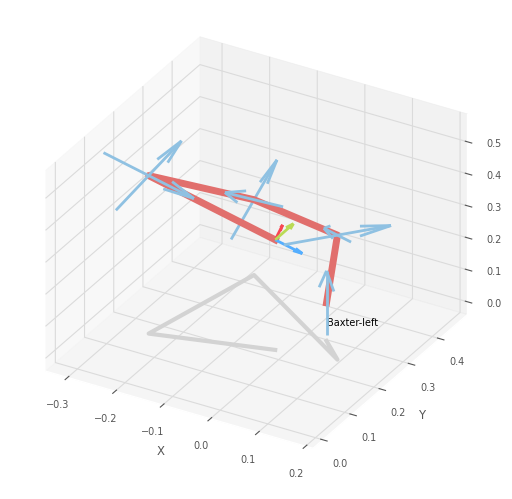

<Figure size 640x480 with 0 Axes>

In [11]:
T_end = sb.transl(random_pose_choice)
q_end = robot.ikine_GN(T_end).q  # Есть другие методы, помимо ikine_GN
robot.plot(q_end)
plt.show()

### 8. Спланируем траекторию

We will use three methods for planning the path from the initial pose to the final pose. Two of them will be in coordinate space and one will be in task space.

1- Trapezoidal path: 
    The velocity will increase linearly until it reaches a value then it will be constant for a while and then decrease linearly. The position will be smooth but the velocity will not be. The acceleration profile will have discontinuity.

2- Quintic path:
    The position will follow a quintic polynomial. In this case we have 6 parameters to determine. Thus we need 6 conditions. We know the initial and final configuration. We also want the robot to start with zero velocity and end with zero velocity. The same logic works for the acceleration. The sum of these conditions is 6.

3-  Trapezoidal path in task space:
    The velocity will follow a trapezoidal profile along the path. It is the same as trapezoidal path on the configuration space but on different space.

First we deffine how many points we want on the path $N = 100$. Then we deffine the duration of the task $t = 5 s$. Finally we deffine the sequence of moments that we want to find the configuration at.

In [12]:
N = 100
t_start = 0
t_stop = 5
t_shag = t_stop/N
time = np.arange(t_start, t_stop, t_shag)


We start with the trapezoidal path in configuration space:

In [39]:
tr_trap = rtb.mtraj(rtb.trapezoidal, q_start, q_end, time)

The quintic path:

In [14]:
tr_quin = rtb.mtraj(rtb.quintic, q_start, q_end, time)

The trapezoidal path in the task space:
Here we need to provide instead of $q_{start}$ and $q_{end}$, the initial and final transformation matrix.

In [55]:
T_end_SE3 = sm.SE3(T_end)
tr_ts = rtb.ctraj(T_start,T_end_SE3,time)

tr_ts_q = []
translations = []
for pose in tr_ts:
    tr_ts_q.append(robot.ikine_GN(pose).q)
    translations.append(np.array(pose)[0:3,3])


tr_ts_q = np.stack(tr_ts_q,axis = 0)
translations = np.stack(translations, axis = 1)

There is no sense in ploting the change of the generalized coordinates in this case. But we can show the poaition of the end-effector in the 3D space. We can notice the effect of the trapezoidal path in task space by looking at the distance between the red points. In the beginning they are really close, meaning that the velocity is low and then they start to move away which means that the velocity is increasing. In the middle we notice that the distance between points are the same meaning that the velocity is constant. Finally, the decreasing of veocity can be seen by the closeness of points to each other.

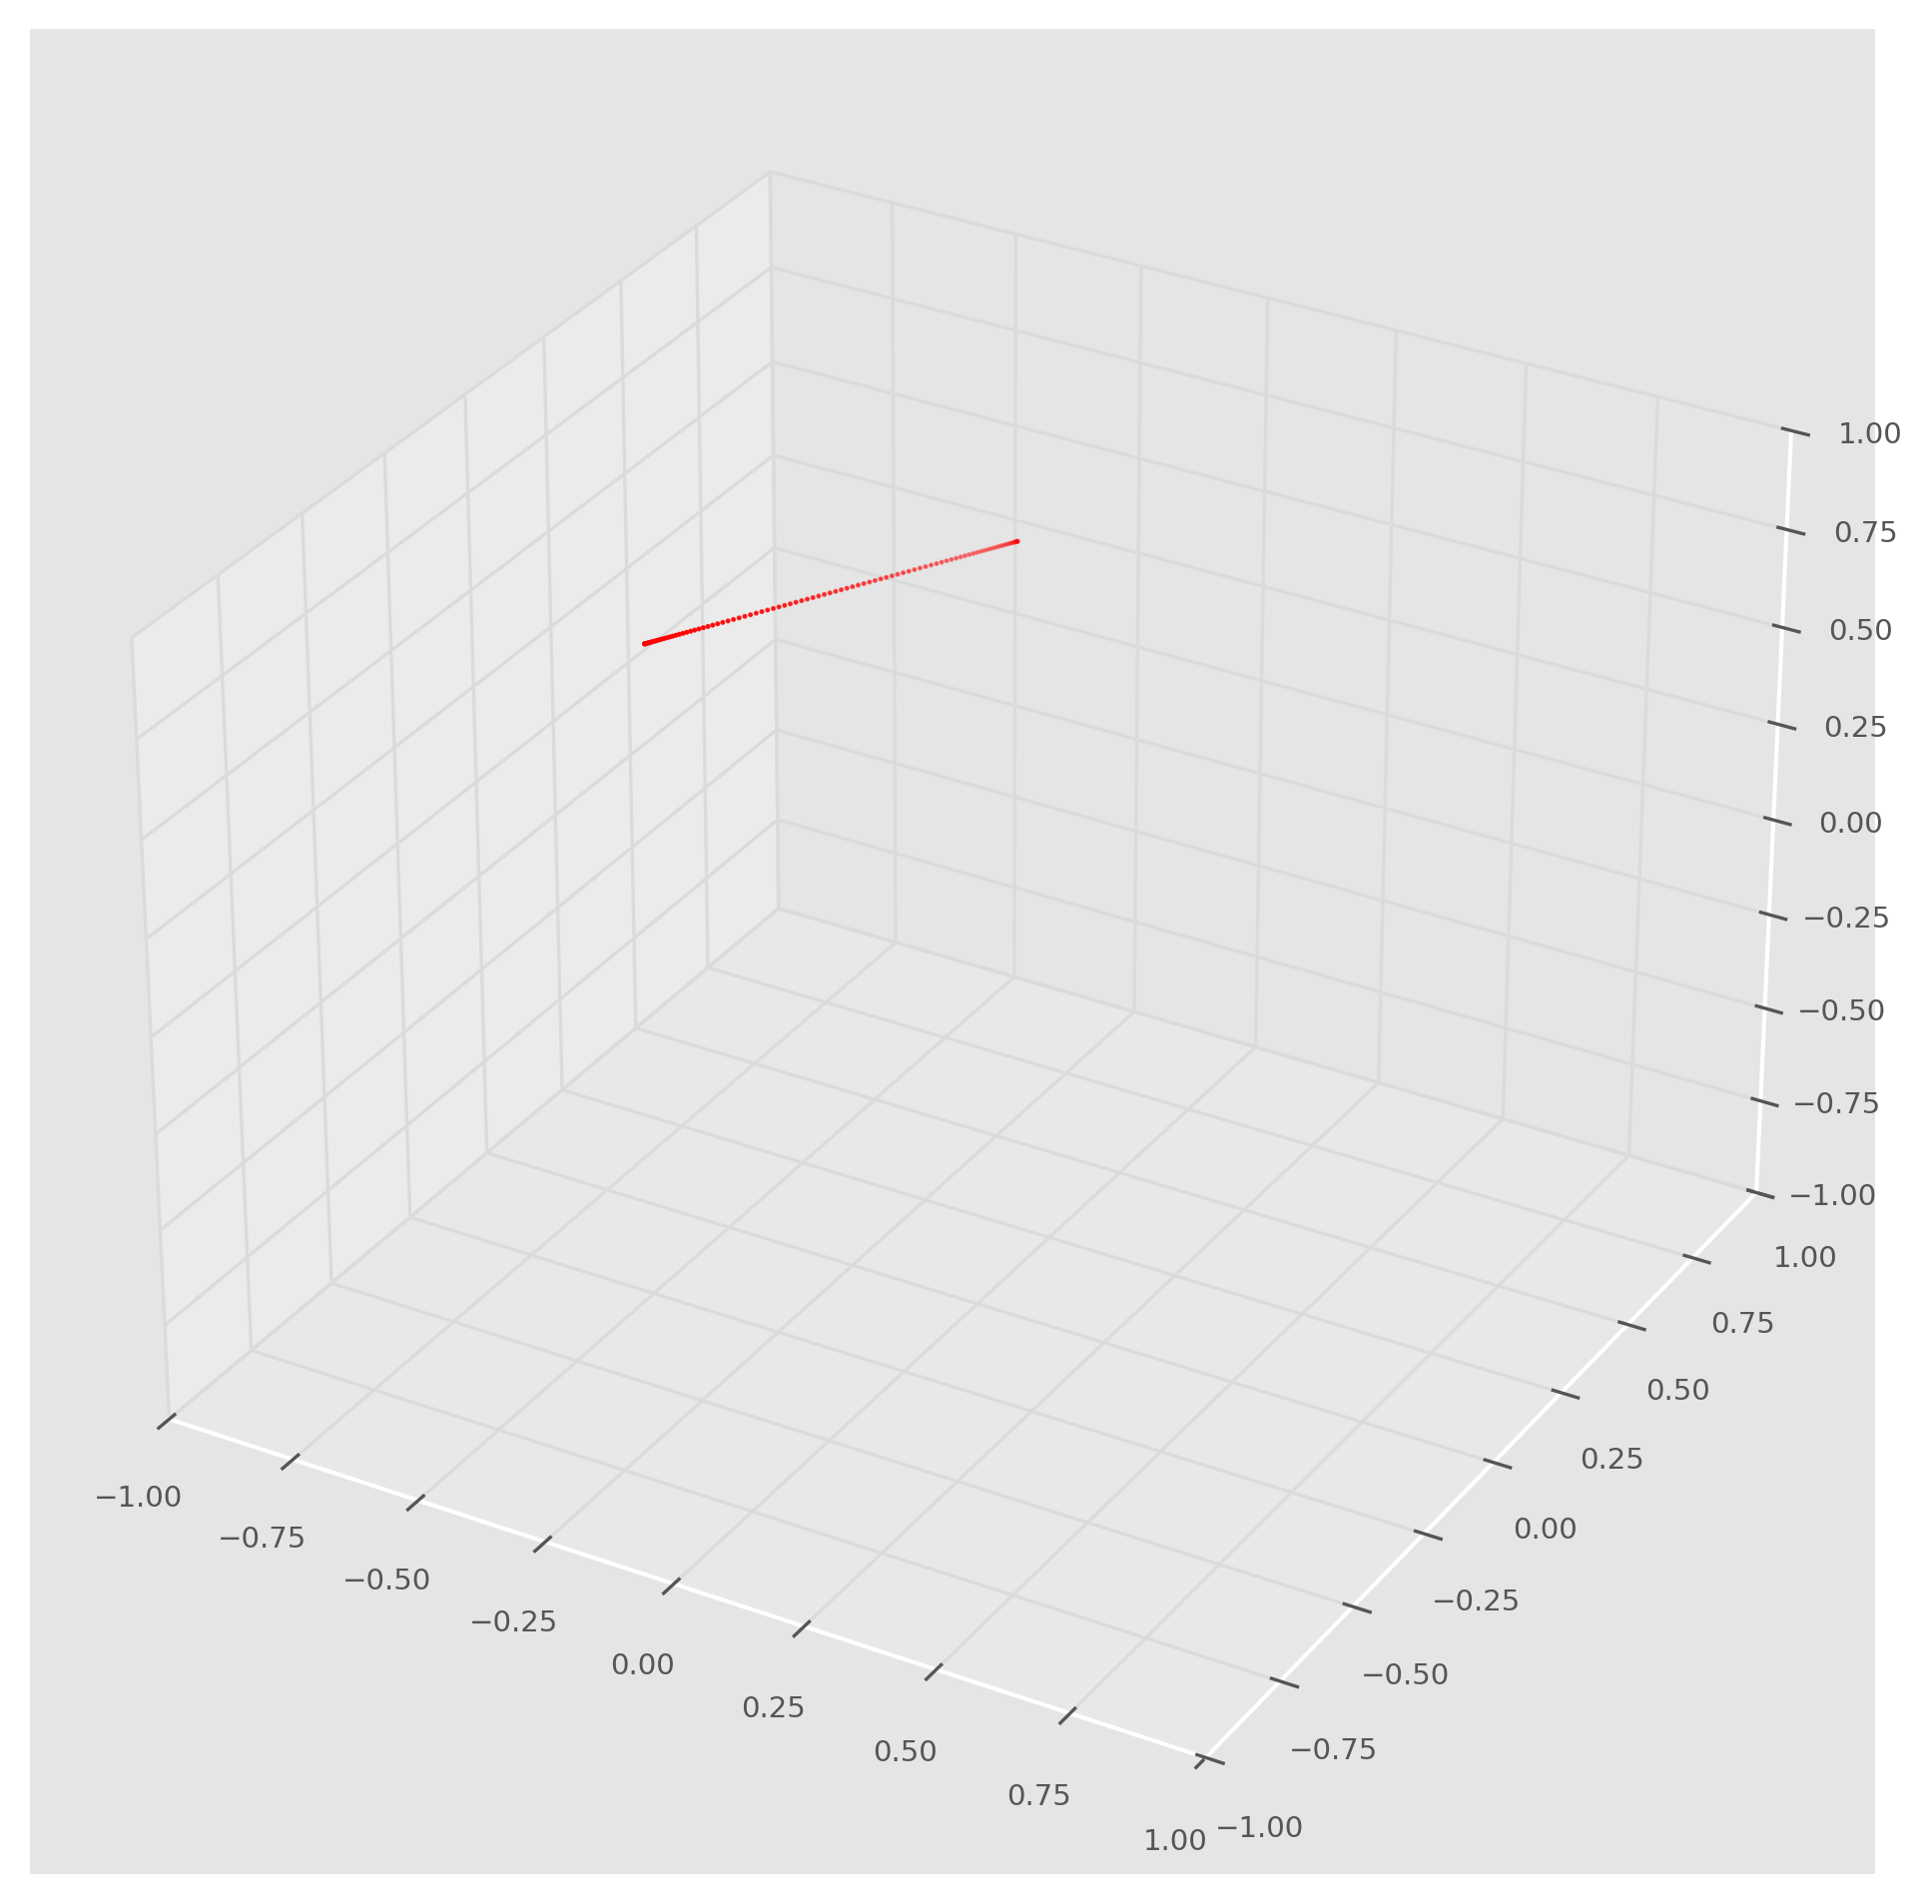

In [60]:
plt.figure(figsize=(8,8), dpi=300)
ax = plt.axes(projection="3d")
ax.scatter3D(translations[0], translations[1], translations[2], s=0.5, color='red')
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
ax.set_zlim(-1,1)
plt.show()

### 9. Построим графики

We plot the position, speed and aceleration of the trapezoidal and quintic methods:

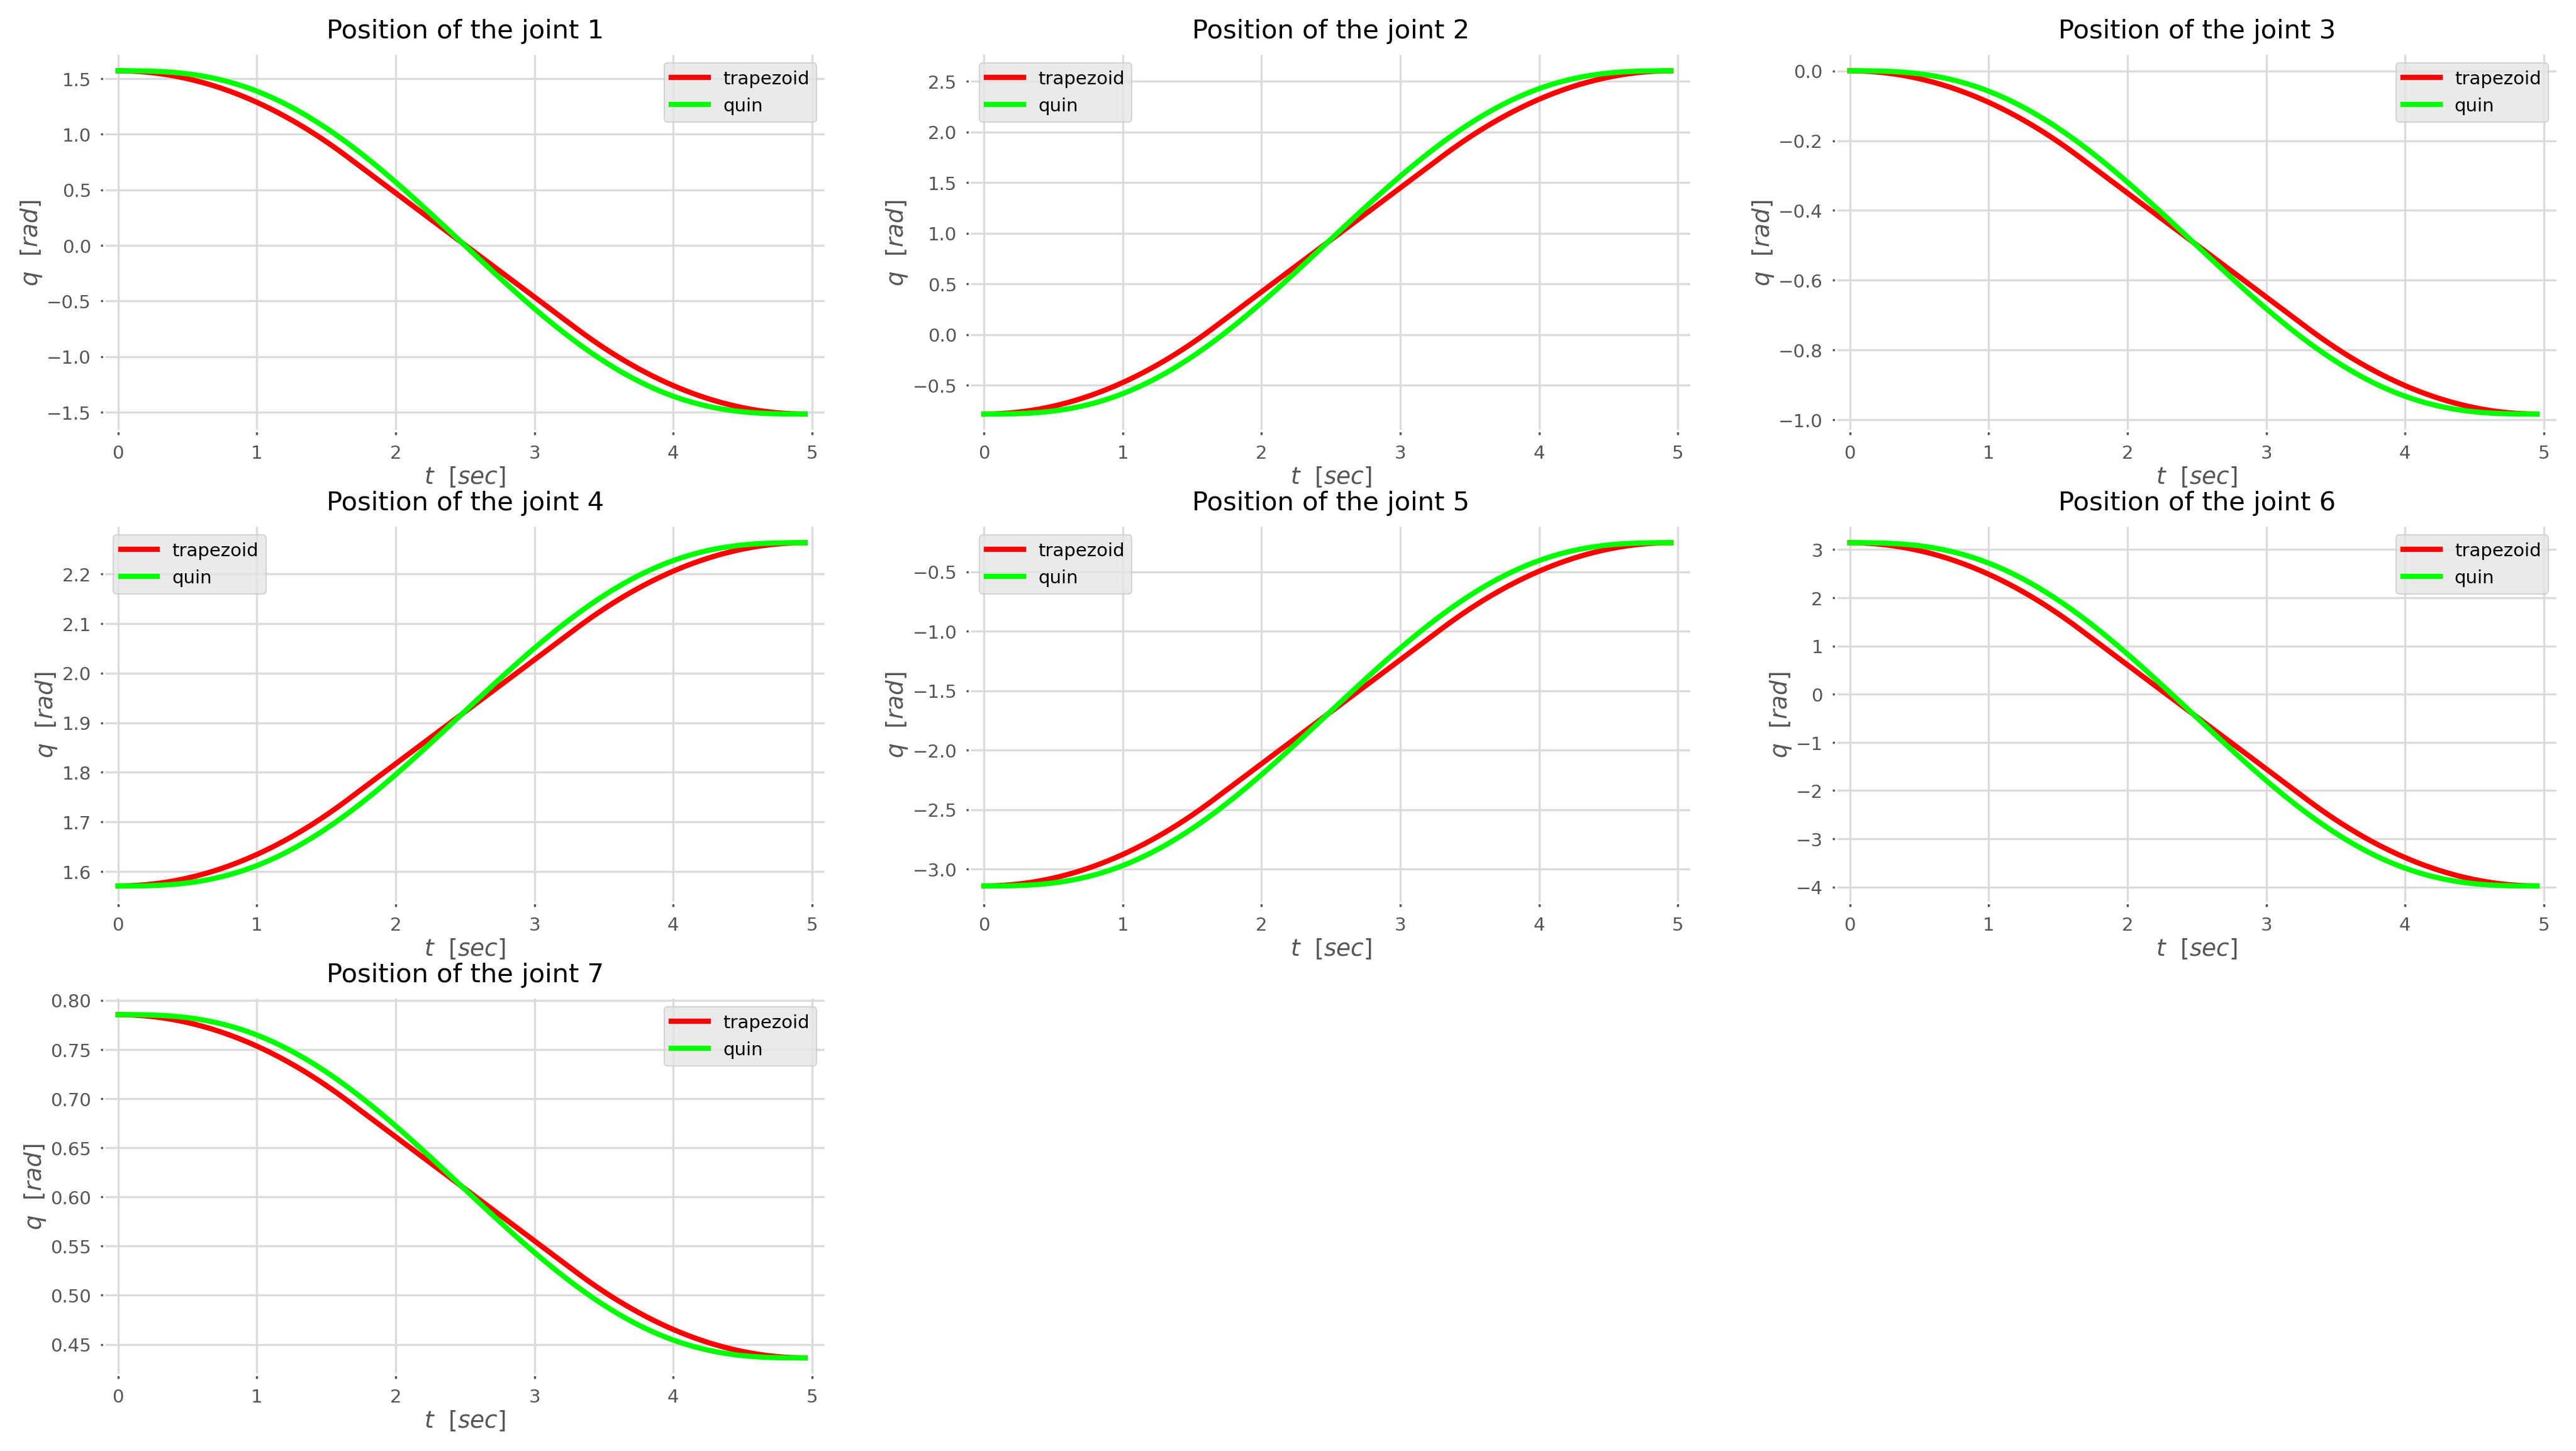

In [68]:
plt.figure(figsize=(13,7), dpi=300)  # Задаем размеры холста и плотность точек (четкость графика)
for g in range(1,8):
    plt.subplot(3,3,g)
    plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0.2, hspace=0.25)  # Задаем интервалы между графиками, чтоб не перекрывали друг друга
    traektoriya_jtraj = [tr_trap.q[i][g-1] for i in range(len(tr_trap.q))]  # Извлекаем нужные данные
    traektoriya_trap = [tr_quin.q[i][g-1] for i in range(len(tr_quin.q))]  # Извлекаем нужные данные
    plt.plot(time, traektoriya_jtraj, linestyle='-', linewidth=2, color=(1,0,0), label=r"trapezoid")  # Рисуем линию
    plt.plot(time, traektoriya_trap, linestyle='-', linewidth=2, color=(0,1,0), label=r"quin")  # Рисуем линию
    plt.title(r"Position of the joint {}".format(g), fontsize=10)  # Название графика
    plt.ylabel(r"$q$  [$rad$]", fontsize=9)  # Подпись оси Y
    plt.xlabel(r"$t$  [$sec$]", fontsize=9)  # Подпись оси X
    plt.grid(True)  # Добавить сетку
    plt.legend()  # Отобразить легенду (покажет то, что написано в 'label')
    ax = plt.gca()  # gca = get current axis - чтобы редактировать конкретную фигуру
    ax.set_facecolor((1,1,1))  # Цвет фона на графике
    ax.set_xlim([t_start-0.1,t_stop+0.1])  # Пределы по оси X
plt.show()

Построим графики скоростей для каждого звена

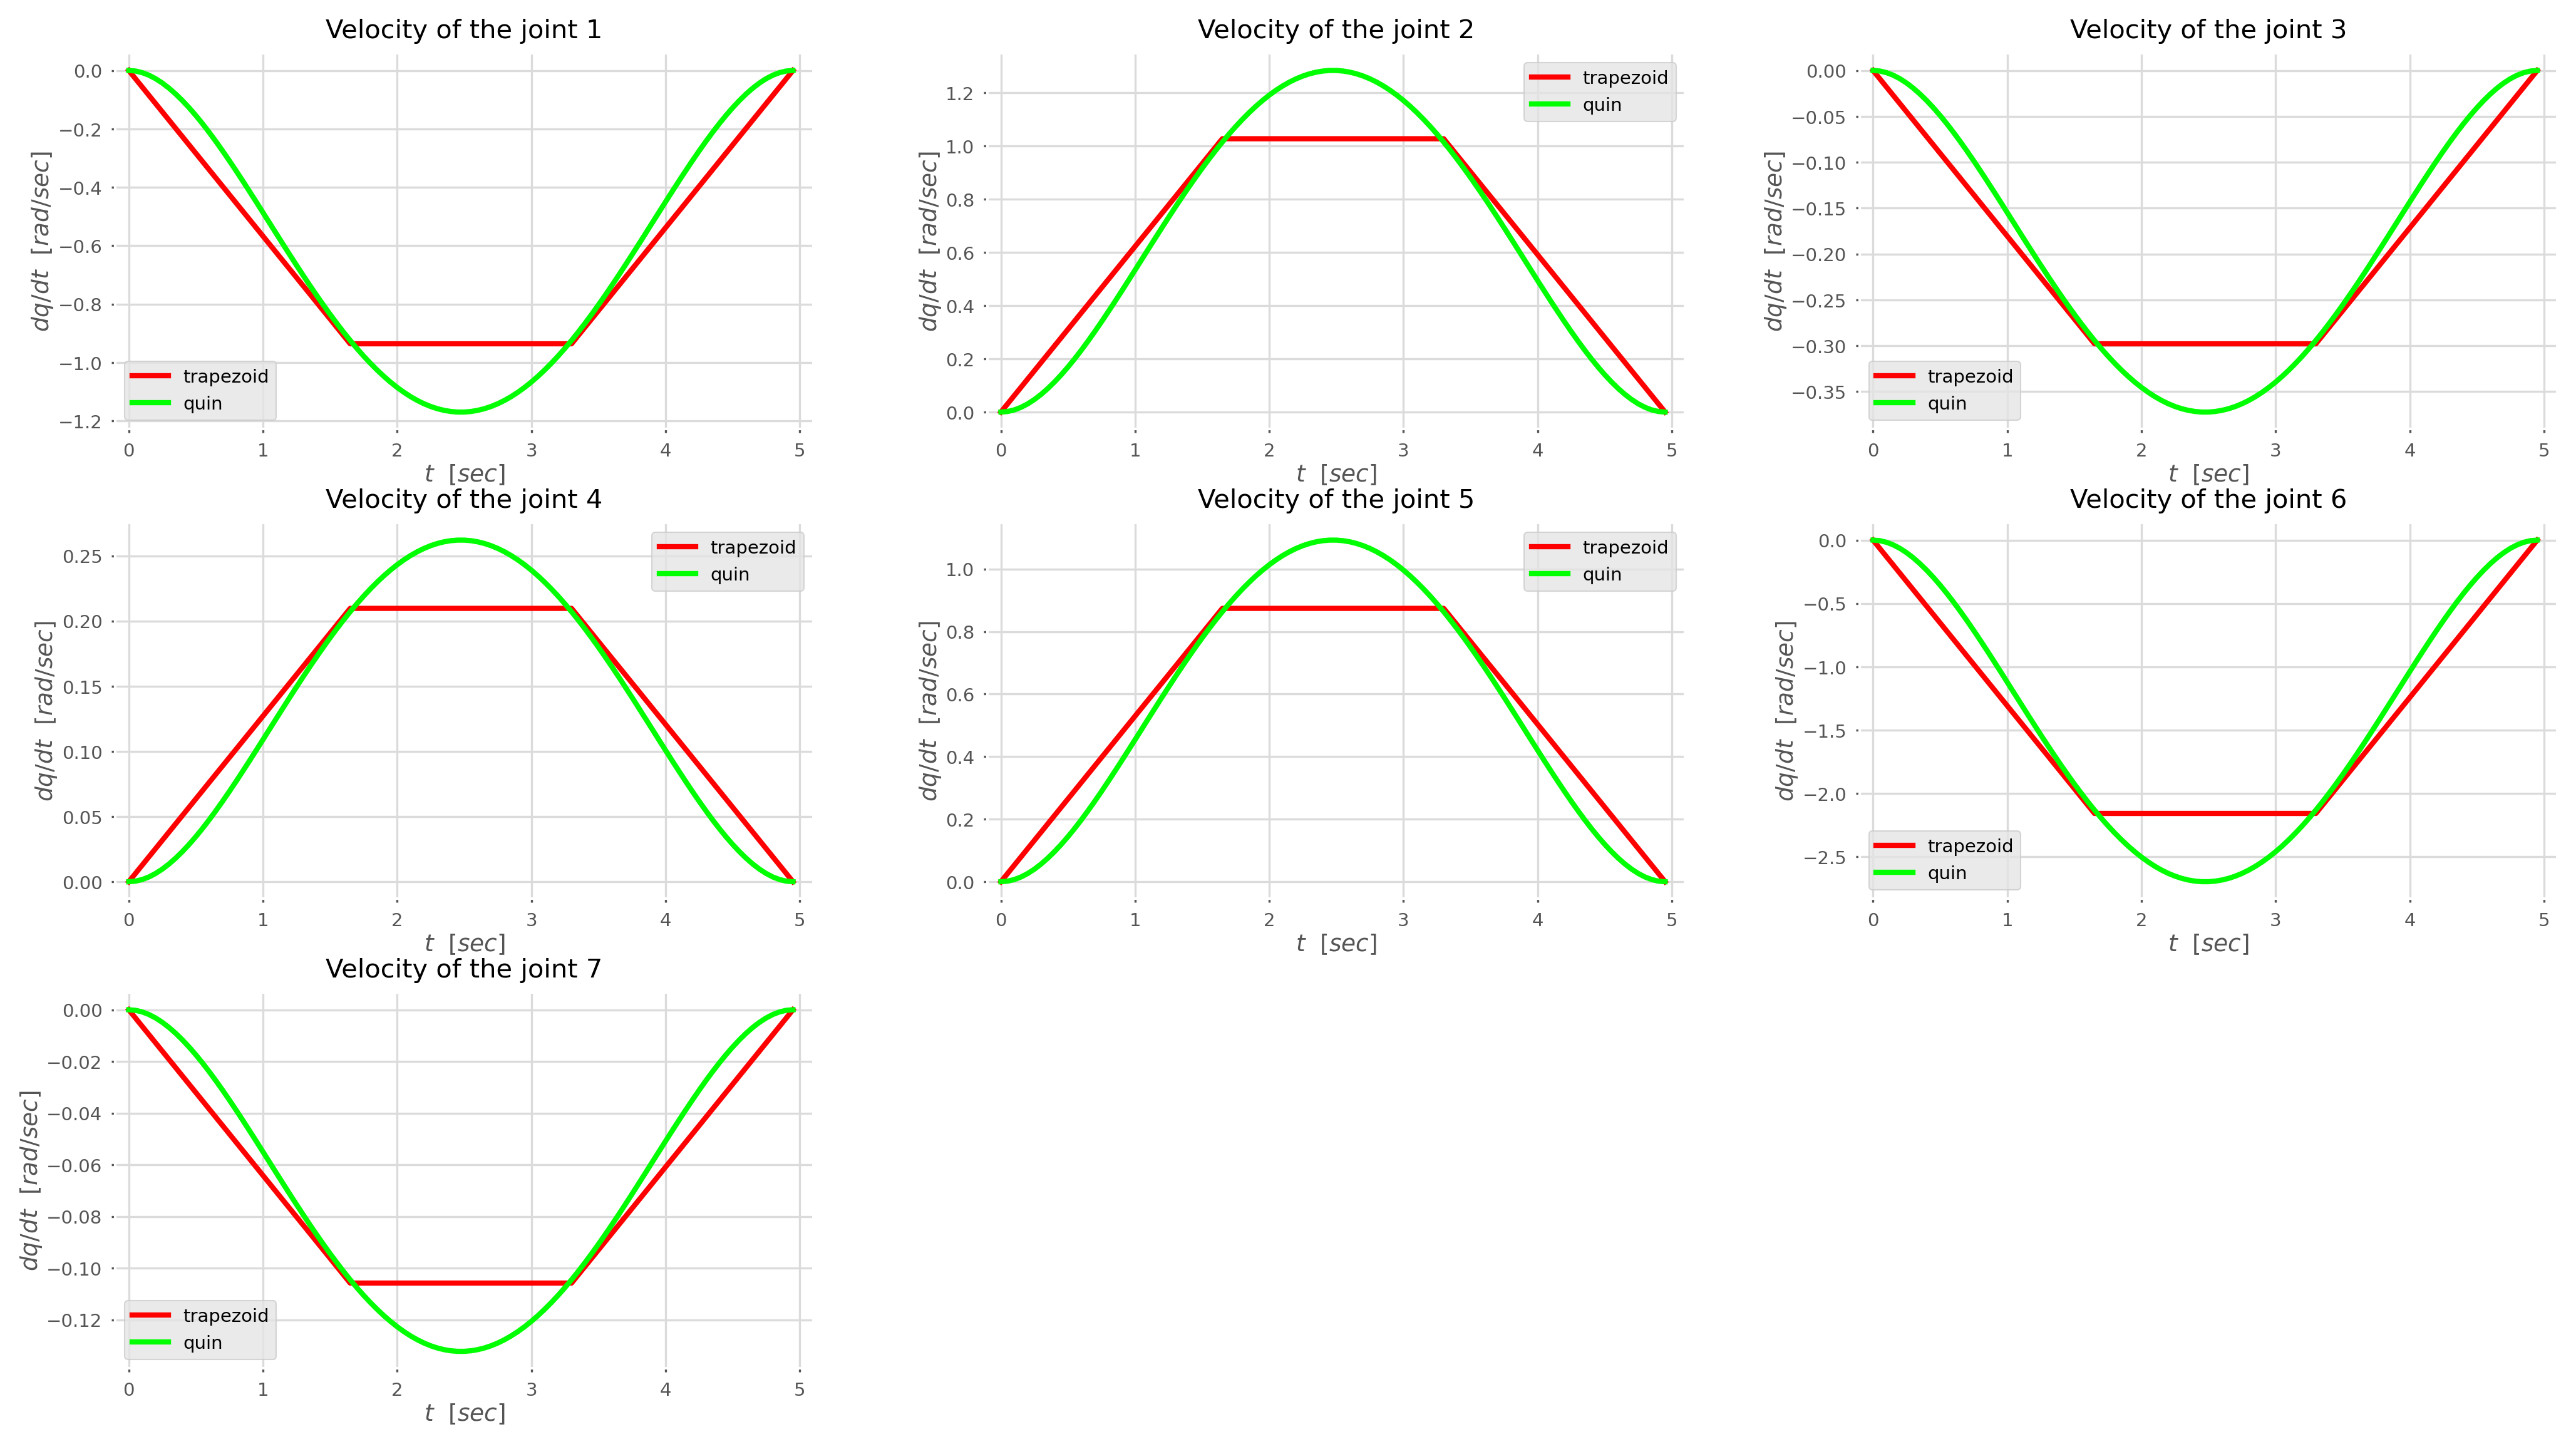

In [70]:
plt.figure(figsize=(13,7), dpi=300)  # Задаем размеры холста и плотность точек (четкость графика)
for g in range(1,8):
    plt.subplot(3,3,g)
    plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0.25, hspace=0.25)  # Задаем интервалы между графиками, чтоб не перекрывали друг друга
    traektoriya_jtraj = [tr_trap.qd[i][g-1] for i in range(len(tr_trap.qd))]  # Извлекаем нужные данные
    traektoriya_trap = [tr_quin.qd[i][g-1] for i in range(len(tr_quin.qd))]  # Извлекаем нужные данные
    plt.plot(time, traektoriya_jtraj, linestyle='-', linewidth=2, color=(1,0,0), label=r"trapezoid")  # Рисуем линию
    plt.plot(time, traektoriya_trap, linestyle='-', linewidth=2, color=(0,1,0), label=r"quin")  # Рисуем линию
    plt.title(r"Velocity of the joint {}".format(g), fontsize=10)  # Название графика
    plt.ylabel(r"$dq/dt$  [$rad/sec$]", fontsize=9)  # Подпись оси Y
    plt.xlabel(r"$t$  [$sec$]", fontsize=9)  # Подпись оси X
    plt.grid(True)  # Добавить сетку
    plt.legend()  # Отобразить легенду (покажет то, что написано в 'label')
    ax = plt.gca()  # gca = get current axis - чтобы редактировать конкретную фигуру
    ax.set_facecolor((1,1,1))  # Цвет фона на графике
    ax.set_xlim([t_start-0.1,t_stop+0.1])  # Пределы по оси X
plt.show()

Построим графики ускорений для каждого звена

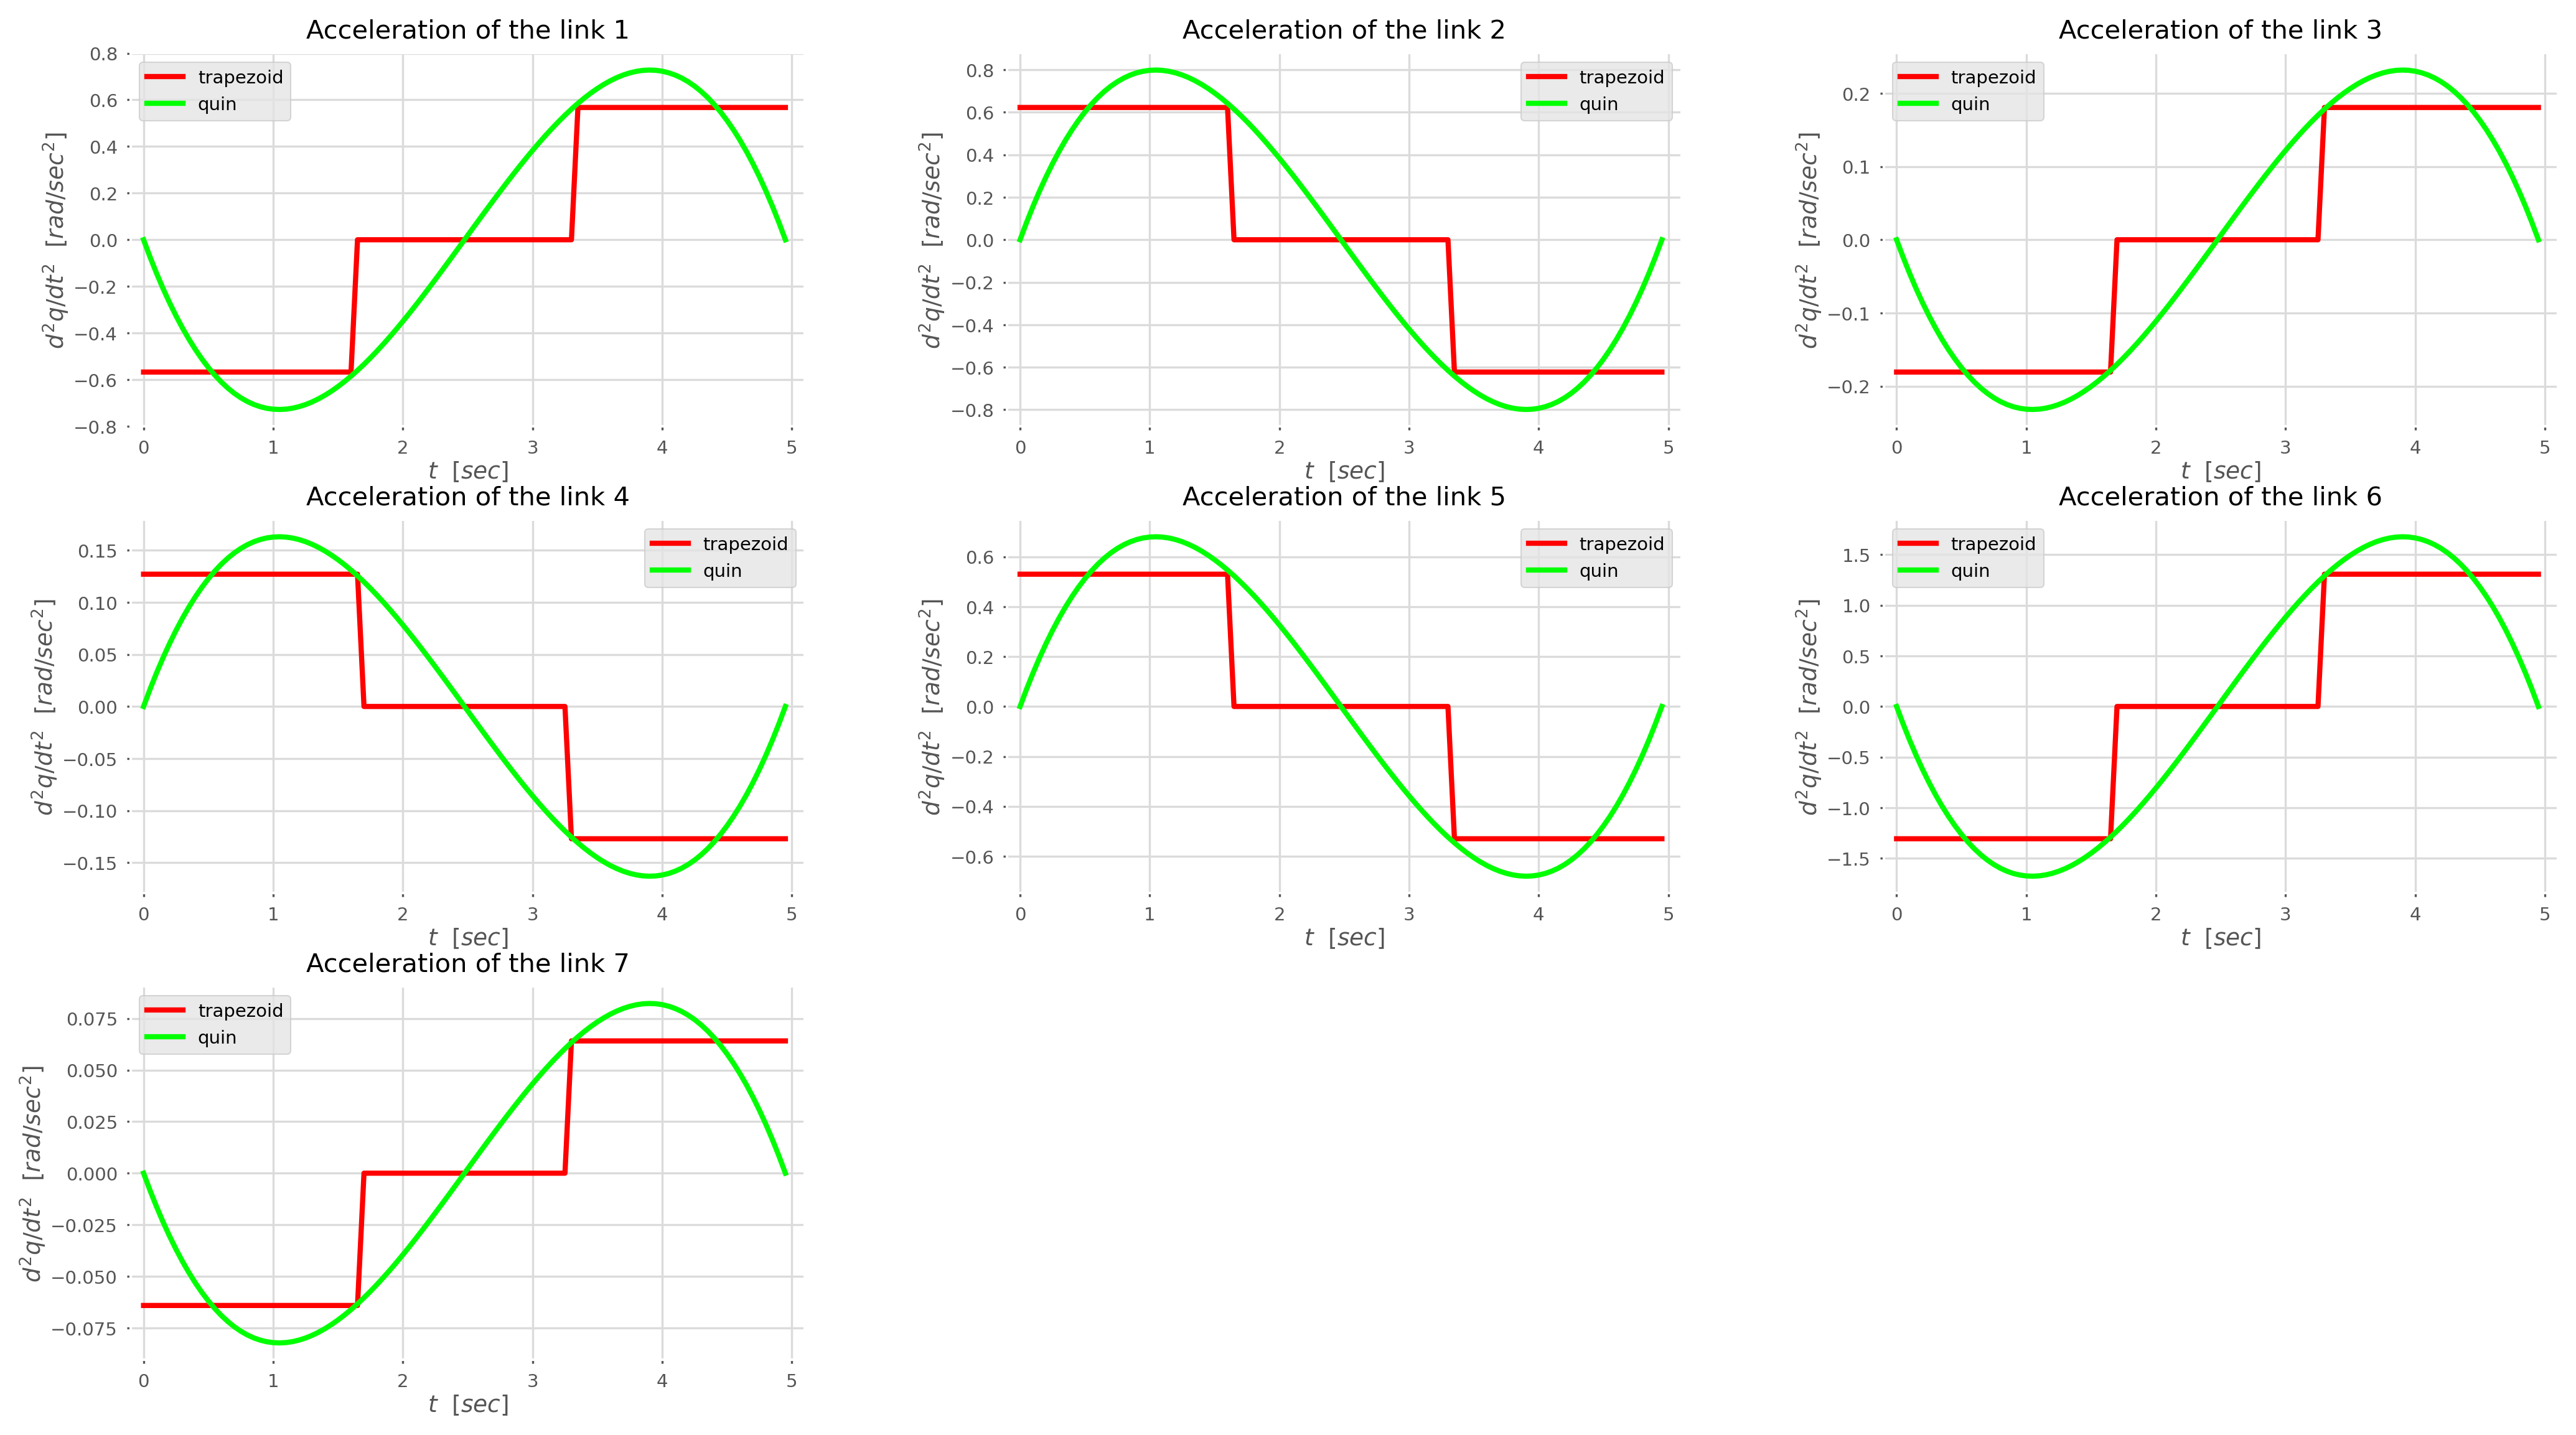

In [71]:
fig = plt.figure(figsize=(13,7), dpi=300)  # Задаем размеры холста и плотность точек (четкость графика)
for g in range(1,8):
    plt.subplot(3,3,g)
    plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0.3, hspace=0.25)  # Задаем интервалы между графиками, чтоб не перекрывали друг друга
    traektoriya_jtraj = [tr_trap.qdd[i][g-1] for i in range(len(tr_trap.qdd))]  # Извлекаем нужные данные
    traektoriya_trap = [tr_quin.qdd[i][g-1] for i in range(len(tr_quin.qdd))]  # Извлекаем нужные данные
    plt.plot(time, traektoriya_jtraj, linestyle='-', linewidth=2, color=(1,0,0), label=r"trapezoid")  # Рисуем линию
    plt.plot(time, traektoriya_trap, linestyle='-', linewidth=2, color=(0,1,0), label=r"quin")  # Рисуем линию

    plt.title(r"Acceleration of the link {}".format(g), fontsize=10)  # Название графика
    plt.ylabel(r"${d^2}q/d{t^2}$  [$rad/{sec}^2$]", fontsize=9)  # Подпись оси Y
    plt.xlabel(r"$t$  [$sec$]", fontsize=9)  # Подпись оси X
    plt.grid(True)  # Добавить сетку
    plt.legend()  # Отобразить легенду (покажет то, что написано в 'label')
    ax = plt.gca()  # gca = get current axis - чтобы редактировать конкретную фигуру
    ax.set_facecolor((1,1,1))  # Цвет фона на графике
    ax.set_xlim([t_start-0.1,t_stop+0.1])  # Пределы по оси X
plt.show()

The results of the plots match the theoritical explanation of each method that we provided. For example the quintic path defines the position as a polynomial from the fifth degree with respect to time. This means that the acceleration should be a polynomial from the third degree and that is obvious in the plots. The velocity in case of trapezoidal case is not smooth and as we can notice the acceleration is not continuous as we said above. This discontinuity makes this hard of path hard to implement practically because we can not provide such torques on the joints.